In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
!kaggle datasets download -d khotijahs1/sheep-goat

Dataset URL: https://www.kaggle.com/datasets/khotijahs1/sheep-goat
License(s): unknown
  0% 0.00/1.83M [00:00<?, ?B/s]
100% 1.83M/1.83M [00:00<00:00, 152MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/sheep-goat.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator


from tensorflow.keras.preprocessing import image

In [5]:

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

In [6]:
train_generator = train_datagen.flow_from_directory(
    '/content/sheep_goat',
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

Found 80 images belonging to 2 classes.


In [23]:
#displaying available classes
classes = train_generator.class_indices
print("Labelled Classes Present:")
for class_name, label in classes.items():
    print(f"{class_name}: {label}")

Labelled Classes Present:
goat: 0
sheep: 1


In [7]:
validation_generator = train_datagen.flow_from_directory(
    '/content/sheep_goat',
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 20 images belonging to 2 classes.


In [8]:

base_model = tf.keras.applications.MobileNetV2(
    input_shape=(*(224,224), 3),
    include_top=False,
    weights='imagenet'
)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [9]:
# Freezing base model
base_model.trainable = False
from keras import Sequential

In [10]:
from keras.layers import Dense,Conv2D,MaxPooling2D
#custom model
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(2, activation='softmax')
])

In [11]:

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
#traning the model
history=model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - accuracy: 0.4995 - loss: 0.7531 - val_accuracy: 0.8000 - val_loss: 0.5702
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step - accuracy: 0.7073 - loss: 0.5705 - val_accuracy: 0.8000 - val_loss: 0.5002
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.7797 - loss: 0.4942 - val_accuracy: 0.9000 - val_loss: 0.3761
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.8672 - loss: 0.4569 - val_accuracy: 0.9000 - val_loss: 0.3564
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.9182 - loss: 0.2927 - val_accuracy: 0.9500 - val_loss: 0.2572
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.9492 - loss: 0.2978 - val_accuracy: 0.9500 - val_loss: 0.2488
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.9583 - loss: 0.1930 - val_accuracy: 0.8500 - val_loss: 0.2717
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.9477 - loss: 0.2261 - val_accuracy: 0.9000 - val_loss: 0.2181
Epoch 9/10
3/3 

In [13]:
model.save('goat_sheep_classifier.keras')

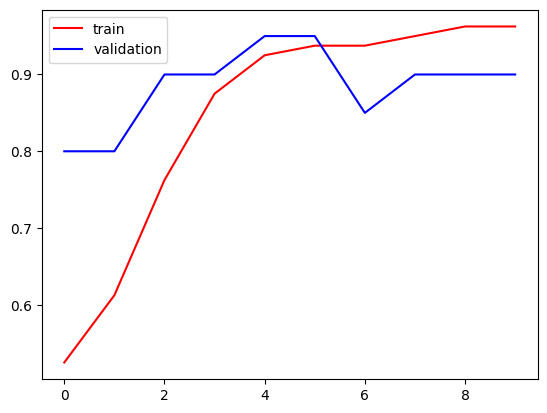

In [14]:
#Visualizing training and validation accuracy
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

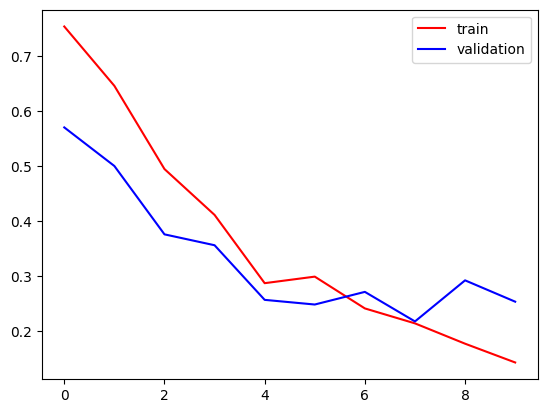

In [15]:
#Visualizing training and validation loss
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [16]:
#preprocessing the image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet_v2.preprocess_input(img_array)

In [17]:
#prediction of the class of input image
def predict_image_class(img_path):
    processed_image = preprocess_image(img_path)
    predictions = model.predict(processed_image)
    predicted_class = np.argmax(predictions, axis=1)[0]
    if predicted_class == 0:
        return 'Goat'
    elif predicted_class == 1:
        return 'Sheep'
    else:
        return 'Not Enough Info About This'

In [21]:

img_path = '/content/SHEEP7.jpg'
predicted_class = predict_image_class(img_path)
print(f'The predicted animal in the image is: {predicted_class}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
The predicted animal in the image is: Sheep
